## Problem Statement 

To develop a machine learning model capable of accurately recognizing and classifying fashion items depicted in the Fashion MNIST dataset. Comprising 60,000 training images and 10,000 testing images, each image is sized 28x28 pixels.


In [2]:
#Importing the necessary Libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential           #For creating Sequential model
from tensorflow.keras.layers import Dense, Flatten       #For creating neural networks
from tensorflow.keras.utils import to_categorical        #For converting labels to one-hot encoding
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Loads the Fashion MNIST dataset, splitting it into training and testing sets

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
# Display the shape of the x_train array
# x_train is the array containing the training data (fashion images)
# The shape attribute returns a tuple representing the dimensions of the array
# This helps to understand the number of training samples and their dimensions
print(x_train.shape)

(60000, 28, 28)


In [5]:
# Display the shape of the y_test array
# y_test is the array containing the labels for the test dataset
# The shape attribute returns a tuple representing the dimensions of the array
# This is useful for understanding the structure and size of the test labels
print(y_test.shape)

(10000,)


#### Scales pixel values to the range [0,1]

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### Convert the labels to one-hot encoded format for multi-class classification

In [7]:
# Let's convert the labels to categorical format
# This code converts the labels into a one-hot encoded format with 10 dimensions
# Each label will be represented as a binary vector of length 10
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# Let's check how the labels look after converting to categorical format
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# 4. Display the 10 classes of images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Visualizes the first 10 images of the training set with their class names.

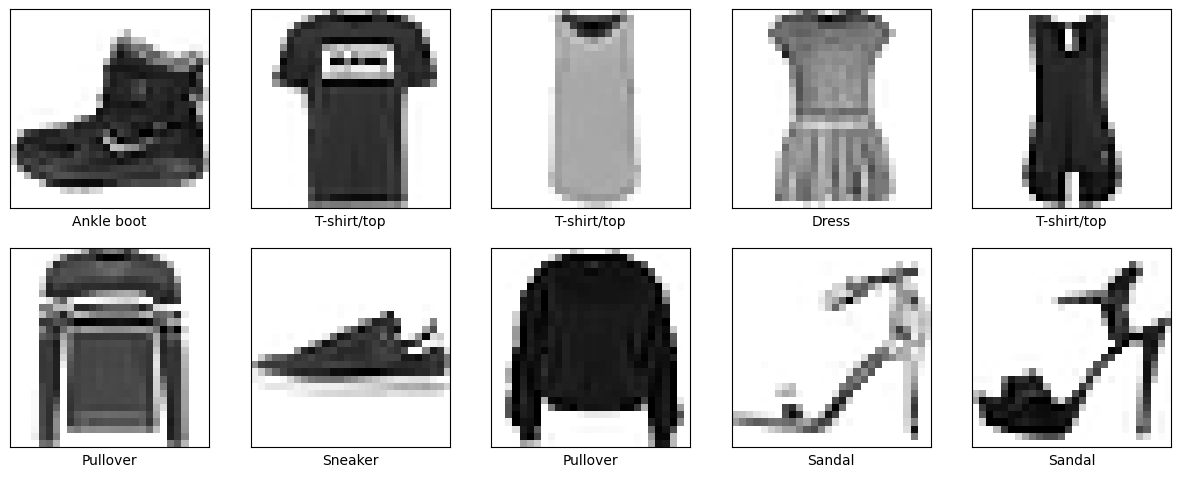

In [10]:
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i].argmax()])
plt.show()

#### Defines a sequential model with a flattening layer and dense layers using ReLU and softmax activations.

In [11]:
model = Sequential()

# Add a Flatten layer to convert the 28x28 input images into a 1D array
# Input shape is set to (28, 28) representing the dimensions of the input images
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))   # First hidden layer with 128 neurons and ReLU as activation function
model.add(Dense(64, activation='relu'))    # Second Hidden layer with 64 neurons and ReLU as activation function

# Add the output layer with 10 neurons (one for each class) and 'softmax' activation function
# Softmax is used for multi-class classification to output probabilities for each class
model.add(Dense(10, activation='softmax'))

#### Display a summary of the model architecture, including the number of parameters in each layer

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


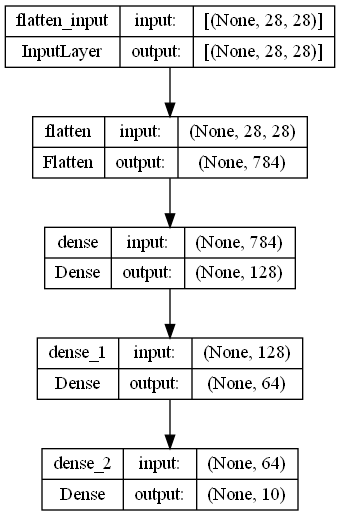

In [15]:
from tensorflow.keras import utils
# Visualize the architecture of the model with its layer shapes
utils.plot_model(model, show_shapes=True)

#### Compiles the model using the Adam optimizer, categorical cross-entropy loss, and accuracy metric.

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Train the model for one epoch on the training data and validate on the test data, storing the training history
history = model.fit(x_train,y_train, epochs=15, validation_data=(x_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3687 - accuracy: 0.8645 - val_loss: 0.4094 - val_accuracy: 0.8469
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3330 - accuracy: 0.8753 - val_loss: 0.3643 - val_accuracy: 0.8683
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3085 - accuracy: 0.8863 - val_loss: 0.3417 - val_accuracy: 0.8770
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2915 - accuracy: 0.8906 - val_loss: 0.3454 - val_accuracy: 0.8759
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2785 - accuracy: 0.8964 - val_loss: 0.3519 - val_accuracy: 0.8741
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2673 - accuracy: 0.8987 - val_loss: 0.3364 - val_accuracy: 0.8825
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2550 - accuracy: 0.9043 - val_loss: 0.3235 - val_accuracy:

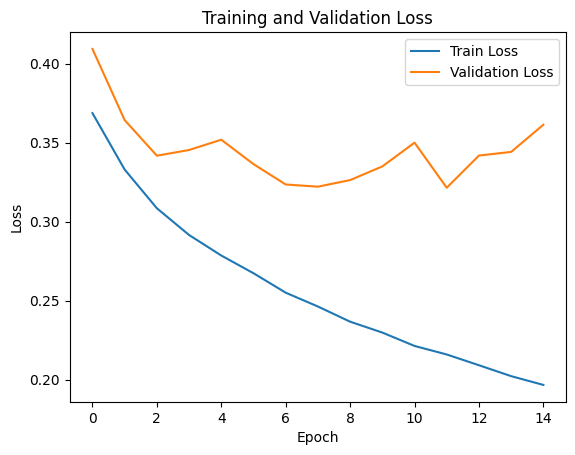

In [20]:
# Plotting the training loss curve
plt.plot(history.history['loss'], label='Train Loss')

# Plotting the validation loss curve
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding legend to the plot
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()

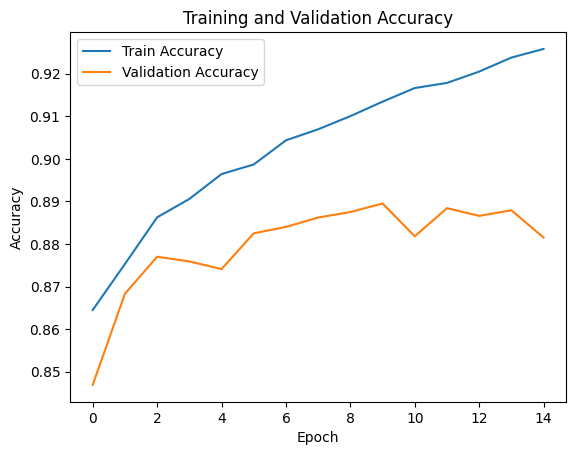

In [21]:
# Plotting the training accuracy curve
plt.plot(history.history['accuracy'], label='Train Accuracy')

# Plotting the validation accuracy curve
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Adding legend to the plot
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [22]:
#Saving the trained model to a file
model.save('Fashion_mnist_model.h5')

In [23]:
#Loading the trained model
model = tf.keras.models.load_model('Fashion_mnist_model.h5')

NameError: name 'axes' is not defined

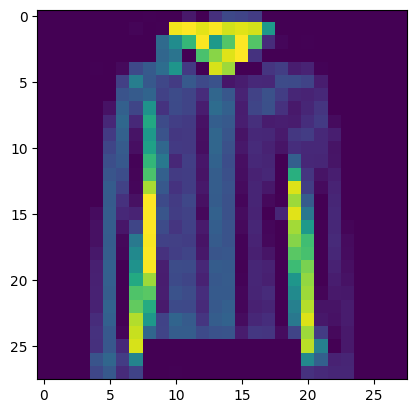

In [24]:
plt.imshow(x_test[6])
# Hide the x-axis
axes[i].get_xaxis().set_visible(False)
# Hide the y-axis
axes[i].get_yaxis().set_visible(False)

#### Predicts the classes for the test images and visualizes the first test image along with its predicted and true labels.

1/1 [==============================] - 0s 19ms/step


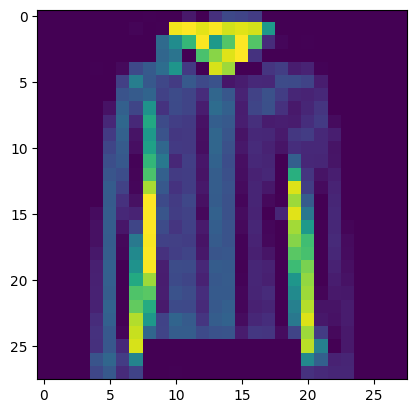

Predicted label: Coat
True label: Coat


In [78]:
prediction = model.predict(x_test[6].reshape(1, 28, 28))
predicted_label = class_names[prediction.argmax()]
true_label = class_names[y_test[6].argmax()]

plt.figure()
plt.imshow(x_test[6])
plt.grid(False)
plt.show()

print(f'Predicted label: {predicted_label}')
print(f'True label: {true_label}')

1/1 [==============================] - 0s 20ms/step


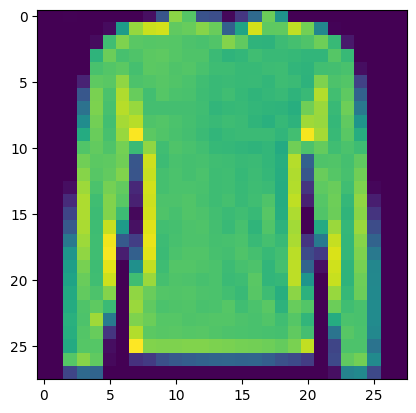

Predicted Label: Pullover
True Label: Pullover


In [82]:
prediction = model.predict(x_test[55].reshape(1,28,28))
predicted_label = class_names[prediction.argmax()]
true_label = class_names[y_test[55].argmax()]

plt.figure()
plt.imshow(x_test[55])
plt.show()

print(f'Predicted Label: {predicted_label}')
print(f'True Label: {true_label}')